## Analysis of NextDoor

The following script to perform some simple statistical analyses of the users' interactions on Nextdoor:

Our main questions are as follow:

1. Are reaction counts and comment counts correlated?
2. Are some neighbourhoods more active than other neighbourhoods?
3. Do socioeconomic factors (e.g., income, etc.) play a role in predicting the level of interactions?


Please note that identifying (meta)data have been removed.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [2]:
dir = r"https://raw.githubusercontent.com/Learning-CCS-by-JY/SMCA/main/Dataset/merge%20data.csv" #change your directory here

df = pd.read_csv(dir) #Import dataset

### Reaction count and comment counts

In this part, we are going to look into how reaction count and comment counts correlated to each other. We are also going to visualise the correlation with Seaborn.

In [3]:
#Subset dataset
df_reaction_comment = df[['ID','Neighbourhood','Reaction Count', 'Comment Count']] #retain only useful columns

print(f"Unique neighbourhoods: {df_reaction_comment['Neighbourhood'].unique()}") #find unique neighbourhoods

df_reaction_comment = df_reaction_comment[~df_reaction_comment['Neighbourhood'].str.contains('Nextdoor', na = False)] #apply mask to filter out str that contains nextdoor official feeds

df_reaction_comment #print dataset

Unique neighbourhoods: ['Indische Buurt Zuid West' 'Czaar Peter' 'Linnaeusbuurt' 'Dapperbuurt'
 'Kadijken' 'Indische Buurt West' 'Oosterparkbuurt' 'Transvaalbuurt'
 'Weesperbuurt/Plantage' 'Cruquius']


,ID,Neighbourhood,Reaction Count,Comment Count
0,s_17592213863608,Indische Buurt Zuid West,3,0
1,s_17592214199382,Czaar Peter,9,15
2,s_17592214199382,Czaar Peter,9,15
3,s_17592214199382,Czaar Peter,9,15
4,s_17592214199382,Czaar Peter,9,15
...,...,...,...,...
496,s_17592213445598,Transvaalbuurt,3,23
497,s_17592213445598,Transvaalbuurt,3,23
498,s_17592213445598,Transvaalbuurt,3,23
499,s_17592213445598,Transvaalbuurt,3,23


PearsonRResult(statistic=0.3680263190911276, pvalue=1.627008786447936e-17)
The correlation between reaction count and comment count is:
                Reaction Count  Comment Count
Reaction Count        1.000000       0.368026
Comment Count         0.368026       1.000000


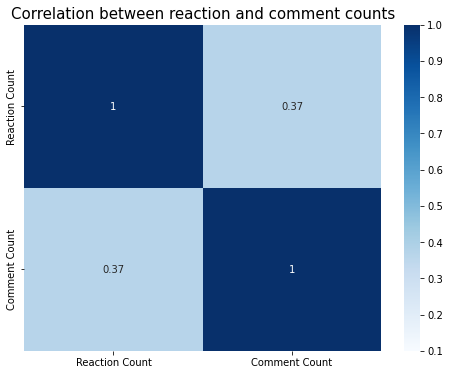

In [4]:
#Correlation
plt.figure(figsize=(8,6)) #set figure size

fig = sns.heatmap(df_reaction_comment.corr(), vmin = 0.1, cmap="Blues", annot = True).set_title('Correlation between reaction and comment counts') #create a heatmap with min value 0.1 and a title
fig.set_size(15) #set title size

CR_corr = pearsonr(df_reaction_comment['Comment Count'], df_reaction_comment['Reaction Count']) #get correlation and p-value

print(CR_corr) #print correlation and p-value

print(f"The correlation between reaction count and comment count is:\n{df_reaction_comment.corr()}")

### Neighbourhoods' activities

In this part, we are going to look into the activities of each neighbourhood.

In [5]:
#Remove outliers 
def Outliers(df):
   Q1=df.quantile(0.25)
   Q3=df.quantile(0.75)

   IQR=Q3-Q1
   outliers = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]

   return outliers

no_outlier_reaction_comment = Outliers(df_reaction_comment).dropna() #drop outliers rows 

#Normalisation
df_reaction_comment['L_Normalised Reaction Count'] = df_reaction_comment.apply(lambda x: np.log10(x['Reaction Count']+1),axis = 1) #log-based normalisation to deal with outliers
df_reaction_comment['L_Normalised Comment Count'] = df_reaction_comment.apply(lambda x: np.log10(x['Comment Count']+1),axis = 1) #log-based normalisation to deal with outliers

display(no_outlier_reaction_comment.groupby('Neighbourhood').describe()) #stats summary for outlier-removed dataset
df_reaction_comment.groupby('Neighbourhood').describe() #stats summary for normalised dataset

C:\Users\shrim\AppData\Local\Temp/ipykernel_25720/1096352113.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
C:\Users\shrim\AppData\Local\Temp/ipykernel_25720/1096352113.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]


Reaction Count                                        \
                                  count       mean       std  min   25%   50%   
Neighbourhood                                                                   
Cruquius                           70.0   8.785714  4.634129  0.0   4.0  12.0   
Czaar Peter                        99.0   4.818182  4.011116  0.0   2.0   3.0   
Dapperbuurt                        37.0   5.945946  5.291219  0.0   1.0   4.0   
Indische Buurt West                35.0  12.828571  5.868589  0.0  13.0  13.0   
Indische Buurt Zuid West            6.0   2.500000  1.224745  0.0   3.0   3.0   
Kadijken                           34.0   4.823529  5.474296  0.0   1.0   2.0   
Linnaeusbuurt                      34.0   7.764706  3.455859  1.0   6.0   9.0   
Oosterparkbuurt                    25.0   7.120000  3.126766  0.0   5.0   9.0   
Transvaalbuurt                     58.0   3.689655  2.663640  0.0   2.0   3.0   
Weesperbuurt/Plantage              59.0   4.440678  1.831442  0.0   4.0   4.0   

                                     Comment Count                            \
                           75%   max         count       mean       std  min   
Neighbourhood                                                                  
Cruquius                  12.0  17.0          70.0   8.057143  3.189138  0.0   
Czaar Peter                9.0  14.0          99.0   6.848485  4.350378  0.0   
Dapperbuurt               12.0  13.0          37.0   6.054054  6.415891  0.0   
Indische Buurt West       18.0  18.0          35.0   0.914286  0.284029  0.0   
Indische Buurt Zuid West   3.0   3.0           6.0   0.166667  0.408248  0.0   
Kadijken                   8.5  17.0          34.0   2.970588  2.315760  0.0   
Linnaeusbuurt             10.5  11.0          34.0  10.382353  6.045357  0.0   
Oosterparkbuurt            9.0   9.0          25.0  12.560000  6.752037  0.0   
Transvaalbuurt             3.0   9.0          58.0  12.327586  9.131376  0.0   
Weesperbuurt/Plantage      4.0  12.0          59.0   8.322034  4.717687  0.0   

                                                 
                          25%   50%   75%   max  
Neighbourhood                                    
Cruquius                  6.0  10.0  10.0  11.0  
Czaar Peter               3.5   7.0   8.5  15.0  
Dapperbuurt               0.0   3.0  14.0  14.0  
Indische Buurt West       1.0   1.0   1.0   1.0  
Indische Buurt Zuid West  0.0   0.0   0.0   1.0  
Kadijken                  1.0   4.0   5.0   6.0  
Linnaeusbuurt             4.5   9.0  16.0  16.0  
Oosterparkbuurt           5.0  17.0  17.0  17.0  
Transvaalbuurt            5.0   9.0  23.0  23.0  
Weesperbuurt/Plantage     6.0   7.0  12.0  14.0

Reaction Count                                   \
                                  count       mean        std  min   25%   
Neighbourhood                                                              
Cruquius                           70.0   8.785714   4.634129  0.0   4.0   
Czaar Peter                       117.0   8.487179   9.440937  0.0   3.0   
Dapperbuurt                        37.0   5.945946   5.291219  0.0   1.0   
Indische Buurt West                35.0  12.828571   5.868589  0.0  13.0   
Indische Buurt Zuid West           32.0  26.468750  11.708790  0.0  32.0   
Kadijken                           34.0   4.823529   5.474296  0.0   1.0   
Linnaeusbuurt                      34.0   7.764706   3.455859  1.0   6.0   
Oosterparkbuurt                    25.0   7.120000   3.126766  0.0   5.0   
Transvaalbuurt                     58.0   3.689655   2.663640  0.0   2.0   
Weesperbuurt/Plantage              59.0   4.440678   1.831442  0.0   4.0   

                                           Comment Count             ...  \
                           50%   75%   max         count       mean  ...   
Neighbourhood                                                        ...   
Cruquius                  12.0  12.0  17.0          70.0   8.057143  ...   
Czaar Peter                3.0  12.0  32.0         117.0   6.410256  ...   
Dapperbuurt                4.0  12.0  13.0          37.0   6.054054  ...   
Indische Buurt West       13.0  18.0  18.0          35.0   0.914286  ...   
Indische Buurt Zuid West  32.0  32.0  32.0          32.0  21.156250  ...   
Kadijken                   2.0   8.5  17.0          34.0   2.970588  ...   
Linnaeusbuurt              9.0  10.5  11.0          34.0  10.382353  ...   
Oosterparkbuurt            9.0   9.0   9.0          25.0  12.560000  ...   
Transvaalbuurt             3.0   3.0   9.0          58.0  12.327586  ...   
Weesperbuurt/Plantage      4.0   4.0  12.0          59.0   8.322034  ...   

                         L_Normalised Reaction Count            \
                                                 75%       max   
Neighbourhood                                                    
Cruquius                                    1.113943  1.255273   
Czaar Peter                                 1.113943  1.518514   
Dapperbuurt                                 1.113943  1.146128   
Indische Buurt West                         1.278754  1.278754   
Indische Buurt Zuid West                    1.518514  1.518514   
Kadijken                                    0.955787  1.255273   
Linnaeusbuurt                               1.059386  1.079181   
Oosterparkbuurt                             1.000000  1.000000   
Transvaalbuurt                              0.602060  1.000000   
Weesperbuurt/Plantage                       0.698970  1.113943   

                         L_Normalised Comment Count                           \
                                              count      mean       std  min   
Neighbourhood                                                                  
Cruquius                                       70.0  0.906983  0.252617  0.0   
Czaar Peter                                   117.0  0.791851  0.282213  0.0   
Dapperbuurt                                    37.0  0.593795  0.517265  0.0   
Indische Buurt West                            35.0  0.275227  0.085501  0.0   
Indische Buurt Zuid West                       32.0  1.172390  0.549942  0.0   
Kadijken                                       34.0  0.498863  0.324960  0.0   
Linnaeusbuurt                                  34.0  0.941133  0.389725  0.0   
Oosterparkbuurt                                25.0  1.009216  0.425820  0.0   
Transvaalbuurt                                 58.0  0.968671  0.427678  0.0   
Weesperbuurt/Plantage                          59.0  0.876124  0.340565  0.0   

                                                                  
                               25%       50%       75%       max  
Neighbourhood

In [7]:
#Find average reaction count and comment count by neighbourhood
df_reaction_comment_avg = no_outlier_reaction_comment.groupby(['Neighbourhood']).mean().unstack()

df_reaction_comment_avg = df_reaction_comment_avg.reset_index(level=[0,1]) #reset from multi-index to one index

df_reaction_comment_avg = df_reaction_comment_avg.rename(columns = {'level_0': 'Count Type', 0:'Value'}) #rename columns

df_reaction_comment_avg

,Count Type,Neighbourhood,Value
0,Reaction Count,Cruquius,8.785714
1,Reaction Count,Czaar Peter,4.818182
2,Reaction Count,Dapperbuurt,5.945946
3,Reaction Count,Indische Buurt West,12.828571
4,Reaction Count,Indische Buurt Zuid West,2.500000
5,Reaction Count,Kadijken,4.823529
6,Reaction Count,Linnaeusbuurt,7.764706
7,Reaction Count,Oosterparkbuurt,7.120000
8,Reaction Count,Transvaalbuurt,3.689655
9,Reaction Count,Weesperbuurt/Plantage,4.440678


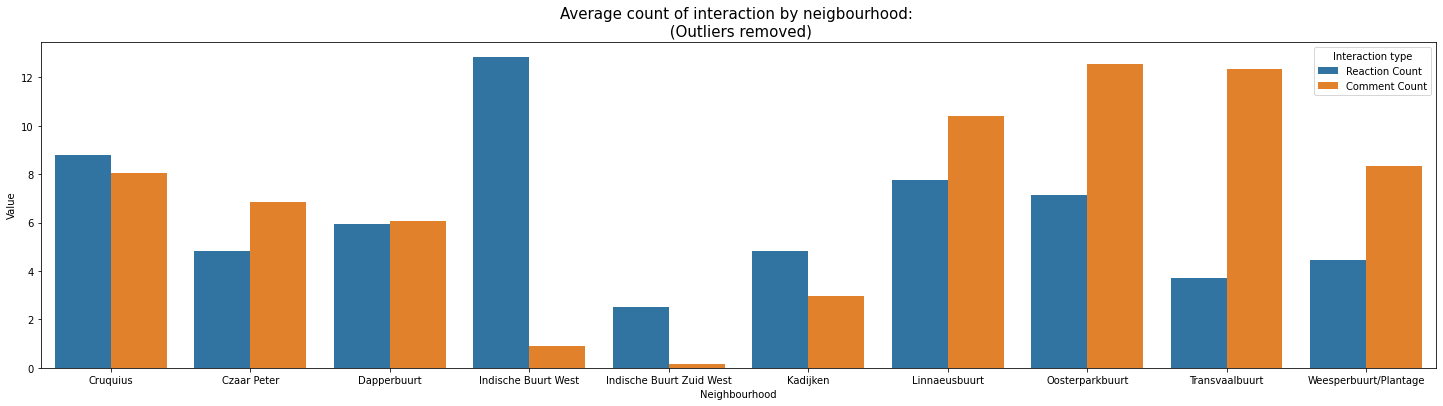

In [8]:
# Plot barplot
plt.figure(figsize=(25,6)) #set figure size

fig = sns.barplot(x = df_reaction_comment_avg['Neighbourhood'], y = df_reaction_comment_avg['Value'], hue = df_reaction_comment_avg['Count Type']).set_title('Average count of interaction by neigbourhood: \n (Outliers removed)')
fig.set_size(15) #set title size

#set legend
plt.legend().set_title('Interaction type')

In [9]:
#Import active user (Source: NextDoor)
active_user = {'Czaar Peter': 780, 'Weesperbuurt/Plantage': 587, 'Indische Buurt Zuid West': 215, 'Linnaeusbuurt': 286, 'Dapperbuurt': 483,
'Indische Buurt West': 554, 'Oosterparkbuurt':340,'Transvaalbuurt':746,'Kadijken':641,'Cruquius':395}

no_outlier_reaction_comment['Neighbourhood active user'] = df_reaction_comment['Neighbourhood'].apply(lambda x: active_user.get(x)) #append to df

In [10]:
no_outlier_reaction_comment['Reaction PAP'] = no_outlier_reaction_comment['Reaction Count'] / no_outlier_reaction_comment['Neighbourhood active user'] #calcuate reaction count per active user (without outlier)
no_outlier_reaction_comment['Comment PAP'] = no_outlier_reaction_comment['Comment Count'] / no_outlier_reaction_comment['Neighbourhood active user'] #calcuate comment count per active user (without outlier)

no_outlier_reaction_comment

,ID,Neighbourhood,Reaction Count,Comment Count,Neighbourhood active user,Reaction PAP,Comment PAP
0,s_17592213863608,Indische Buurt Zuid West,3.0,0.0,215,0.013953,0.000000
1,s_17592214199382,Czaar Peter,9.0,15.0,780,0.011538,0.019231
2,s_17592214199382,Czaar Peter,9.0,15.0,780,0.011538,0.019231
3,s_17592214199382,Czaar Peter,9.0,15.0,780,0.011538,0.019231
4,s_17592214199382,Czaar Peter,9.0,15.0,780,0.011538,0.019231
...,...,...,...,...,...,...,...
496,s_17592213445598,Transvaalbuurt,3.0,23.0,746,0.004021,0.030831
497,s_17592213445598,Transvaalbuurt,3.0,23.0,746,0.004021,0.030831
498,s_17592213445598,Transvaalbuurt,3.0,23.0,746,0.004021,0.030831
499,s_17592213445598,Transvaalbuurt,3.0,23.0,746,0.004021,0.030831


Text(0.5, 1.0, 'Reaction count per active user by neighbourhood')

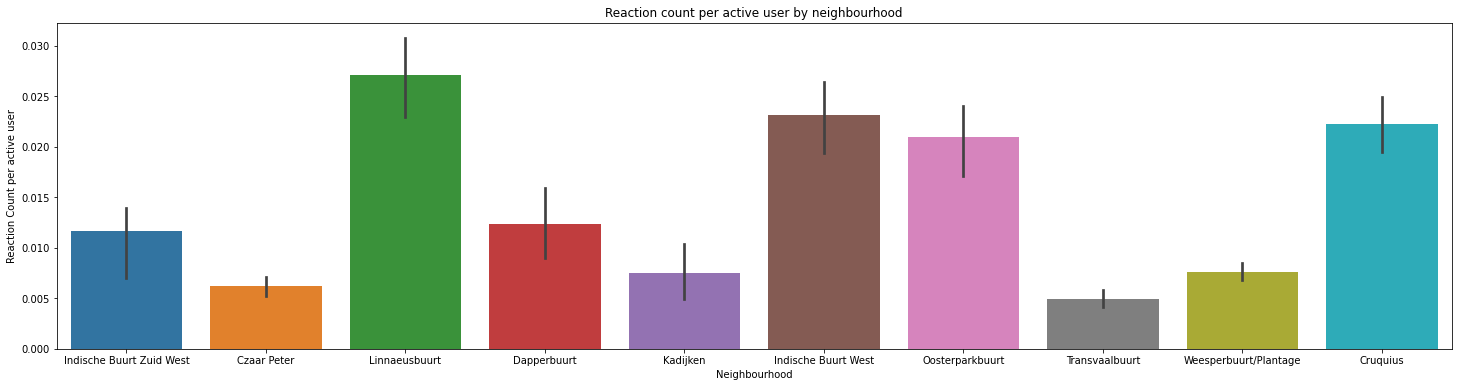

In [11]:
#Plot pap reaction count 
plt.figure(figsize=(25,6)) #set figure size

sns.barplot(x = no_outlier_reaction_comment['Neighbourhood'], y = no_outlier_reaction_comment['Reaction PAP'])
plt.ylabel('Reaction Count per active user')
plt.title('Reaction count per active user by neighbourhood')

Text(0.5, 1.0, 'Comment count per active user by neighbourhood')

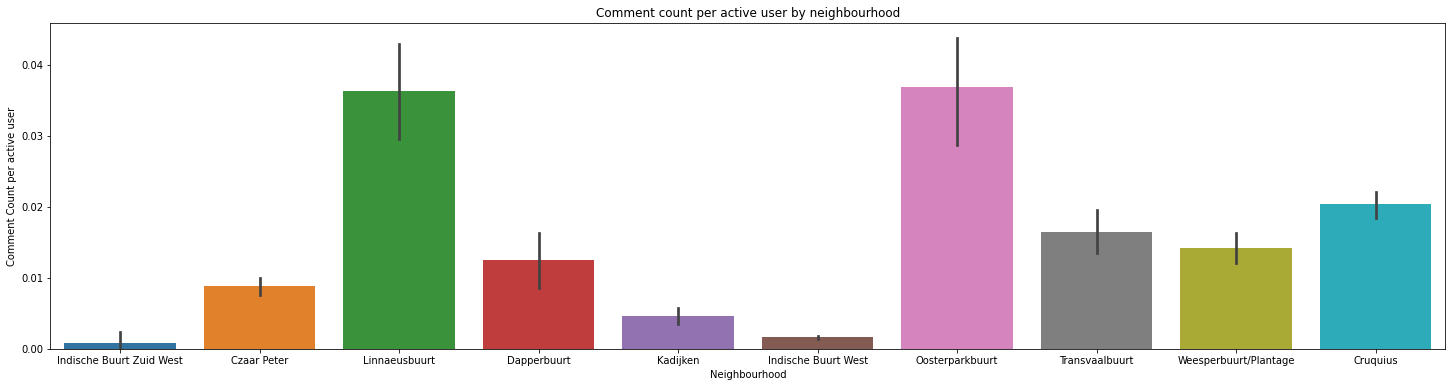

In [12]:
#Plot pap reaction count 
plt.figure(figsize=(25,6)) #set figure size

sns.barplot(x = no_outlier_reaction_comment['Neighbourhood'], y = no_outlier_reaction_comment['Comment PAP'])
plt.ylabel('Comment Count per active user')
plt.title('Comment count per active user by neighbourhood')

## Socio-economic factors

In this section, we are going to investigate how average income, population and home ownership influence interaction on Nextdoor.

Two datasets will be used:
1. Outlier-removed dataset
2. Normalised dataset

The following library must be installed:
1. Statsmodel

In [13]:
#Install statsmodel
import statsmodels.api as sm

In [14]:
# socio-economic factors data (Source: CBS Statline) or you can also directly import data using pandas

income = {'Czaar Peter': 32000, 'Weesperbuurt/Plantage': 45100, 'Indische Buurt Zuid West': 29800, 'Linnaeusbuurt': 44400, 'Dapperbuurt': 30700,
'Indische Buurt West': 28100, 'Oosterparkbuurt':32000,'Transvaalbuurt':27500,'Kadijken':36800,'Cruquius':45000}

population = {'Czaar Peter': 2395, 'Weesperbuurt/Plantage': 7480, 'Indische Buurt Zuid West': 4640, 'Linnaeusbuurt': 2700, 'Dapperbuurt': 10225,
'Indische Buurt West': 12530, 'Oosterparkbuurt':10880,'Transvaalbuurt':9230,'Kadijken':2905,'Cruquius':500}

home_ownership = {'Czaar Peter': 0.23, 'Weesperbuurt/Plantage': 0.35, 'Indische Buurt Zuid West': 0.19, 'Linnaeusbuurt': 0.45, 'Dapperbuurt': 0.26,
'Indische Buurt West': 0.27, 'Oosterparkbuurt':0.25,'Transvaalbuurt':0.23,'Kadijken':0.33,'Cruquius':0.34}

### Outlier-removed dataset

In [15]:
#Append to dataframe 
no_outlier_reaction_comment['Neighbourhood avg income'] = no_outlier_reaction_comment['Neighbourhood'].apply(lambda x: income.get(x))
no_outlier_reaction_comment['Neighbourhood population'] = no_outlier_reaction_comment['Neighbourhood'].apply(lambda x: population.get(x))
no_outlier_reaction_comment['Neighbourhood home ownership'] = no_outlier_reaction_comment['Neighbourhood'].apply(lambda x: home_ownership.get(x))

no_outlier_reaction_comment #print df

,ID,Neighbourhood,Reaction Count,Comment Count,Neighbourhood active user,Reaction PAP,Comment PAP,Neighbourhood avg income,Neighbourhood population,Neighbourhood home ownership
0,s_17592213863608,Indische Buurt Zuid West,3.0,0.0,215,0.013953,0.000000,29800,4640,0.19
1,s_17592214199382,Czaar Peter,9.0,15.0,780,0.011538,0.019231,32000,2395,0.23
2,s_17592214199382,Czaar Peter,9.0,15.0,780,0.011538,0.019231,32000,2395,0.23
3,s_17592214199382,Czaar Peter,9.0,15.0,780,0.011538,0.019231,32000,2395,0.23
4,s_17592214199382,Czaar Peter,9.0,15.0,780,0.011538,0.019231,32000,2395,0.23
...,...,...,...,...,...,...,...,...,...,...
496,s_17592213445598,Transvaalbuurt,3.0,23.0,746,0.004021,0.030831,27500,9230,0.23
497,s_17592213445598,Transvaalbuurt,3.0,23.0,746,0.004021,0.030831,27500,9230,0.23
498,s_17592213445598,Transvaalbuurt,3.0,23.0,746,0.004021,0.030831,27500,9230,0.23
499,s_17592213445598,Transvaalbuurt,3.0,23.0,746,0.004021,0.030831,27500,9230,0.23


                            OLS Regression Results                            
Dep. Variable:           Reaction PAP   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     31.50
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.65e-18
Time:                        23:02:39   Log-Likelihood:                 1436.9
No. Observations:                 457   AIC:                            -2866.
Df Residuals:                     453   BIC:                            -2849.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

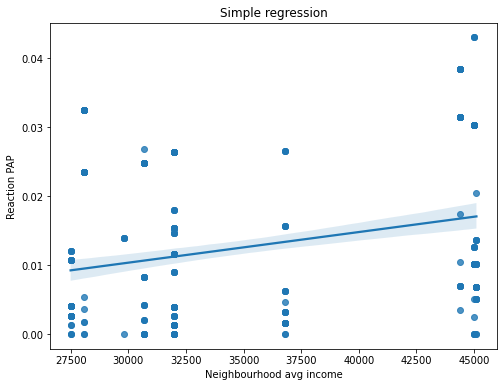

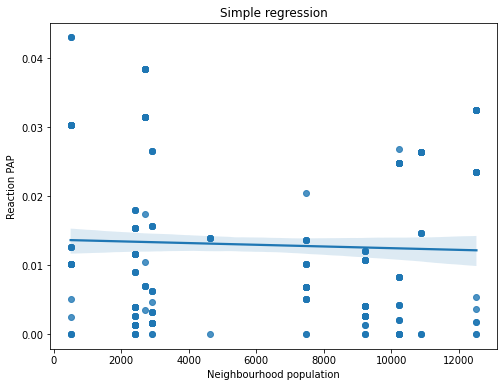

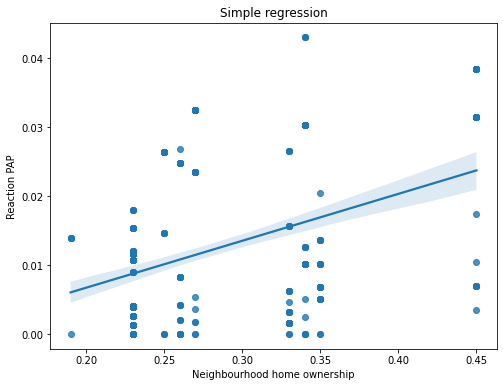

In [16]:
#Regression Analysis
'''
Predictor: AVG INCOME, Population, Home ownership
Outcome: REACTION PAP
'''
#Plotting 
plt.figure(figsize=(8,6)) #set figure size
sns.regplot(x = no_outlier_reaction_comment['Neighbourhood avg income'], y = no_outlier_reaction_comment['Reaction PAP'])
plt.title('Simple regression')

plt.figure(figsize=(8,6)) #set figure size
sns.regplot(x = no_outlier_reaction_comment['Neighbourhood population'], y = no_outlier_reaction_comment['Reaction PAP'])
plt.title('Simple regression')

plt.figure(figsize=(8,6)) #set figure size
sns.regplot(x = no_outlier_reaction_comment['Neighbourhood home ownership'], y = no_outlier_reaction_comment['Reaction PAP'])
plt.title('Simple regression')

#Stat analysis
X = sm.add_constant(no_outlier_reaction_comment[['Neighbourhood avg income','Neighbourhood population', 'Neighbourhood home ownership']]) 
y = no_outlier_reaction_comment['Reaction PAP'] 

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            Comment PAP   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     19.77
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           4.63e-12
Time:                        23:02:41   Log-Likelihood:                 1315.4
No. Observations:                 457   AIC:                            -2623.
Df Residuals:                     453   BIC:                            -2606.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

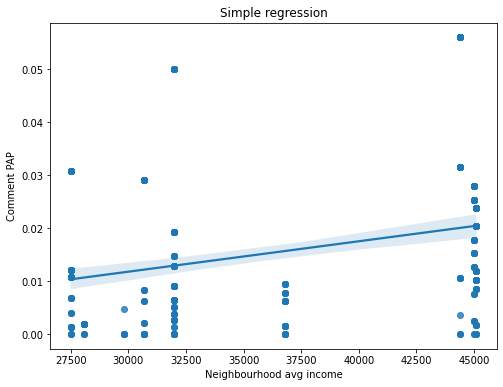

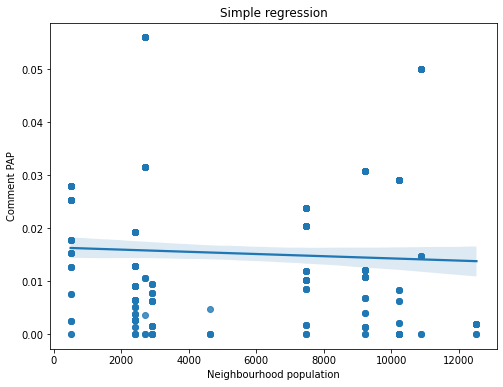

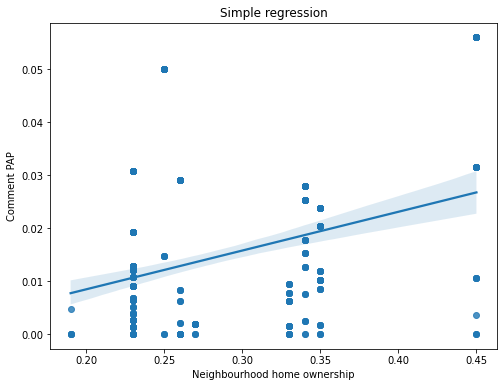

In [17]:
'''
Predictor: AVG INCOME, POPULATION, HOME OWNERSHIP
Outcome: COMMENT PAP
'''
#Plotting 
plt.figure(figsize=(8,6)) #set figure size
sns.regplot(x = no_outlier_reaction_comment['Neighbourhood avg income'], y = no_outlier_reaction_comment['Comment PAP'])
plt.title('Simple regression')

plt.figure(figsize=(8,6)) #set figure size
sns.regplot(x = no_outlier_reaction_comment['Neighbourhood population'], y = no_outlier_reaction_comment['Comment PAP'])
plt.title('Simple regression')

plt.figure(figsize=(8,6)) #set figure size
sns.regplot(x = no_outlier_reaction_comment['Neighbourhood home ownership'], y = no_outlier_reaction_comment['Comment PAP'])
plt.title('Simple regression')

#stats analysis
X = sm.add_constant(no_outlier_reaction_comment[['Neighbourhood avg income','Neighbourhood population', 'Neighbourhood home ownership']]) 
y = no_outlier_reaction_comment['Comment PAP'] 

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

### Normalised dataset

In [18]:
#Append to dataframe
df_reaction_comment['Neighbourhood avg income'] = df_reaction_comment['Neighbourhood'].apply(lambda x: income.get(x))
df_reaction_comment['Neighbourhood population'] = df_reaction_comment['Neighbourhood'].apply(lambda x: population.get(x))
df_reaction_comment['Neighbourhood home ownership'] = df_reaction_comment['Neighbourhood'].apply(lambda x: home_ownership.get(x))

#print
df_reaction_comment

,ID,Neighbourhood,Reaction Count,Comment Count,L_Normalised Reaction Count,L_Normalised Comment Count,Neighbourhood avg income,Neighbourhood population,Neighbourhood home ownership
0,s_17592213863608,Indische Buurt Zuid West,3,0,0.60206,0.000000,29800,4640,0.19
1,s_17592214199382,Czaar Peter,9,15,1.00000,1.204120,32000,2395,0.23
2,s_17592214199382,Czaar Peter,9,15,1.00000,1.204120,32000,2395,0.23
3,s_17592214199382,Czaar Peter,9,15,1.00000,1.204120,32000,2395,0.23
4,s_17592214199382,Czaar Peter,9,15,1.00000,1.204120,32000,2395,0.23
...,...,...,...,...,...,...,...,...,...
496,s_17592213445598,Transvaalbuurt,3,23,0.60206,1.380211,27500,9230,0.23
497,s_17592213445598,Transvaalbuurt,3,23,0.60206,1.380211,27500,9230,0.23
498,s_17592213445598,Transvaalbuurt,3,23,0.60206,1.380211,27500,9230,0.23
499,s_17592213445598,Transvaalbuurt,3,23,0.60206,1.380211,27500,9230,0.23


                                 OLS Regression Results                                
Dep. Variable:     L_Normalised Reaction Count   R-squared:                       0.010
Model:                                     OLS   Adj. R-squared:                  0.004
Method:                          Least Squares   F-statistic:                     1.736
Date:                         Thu, 13 Apr 2023   Prob (F-statistic):              0.159
Time:                                 23:02:44   Log-Likelihood:                -230.59
No. Observations:                          501   AIC:                             469.2
Df Residuals:                              497   BIC:                             486.0
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

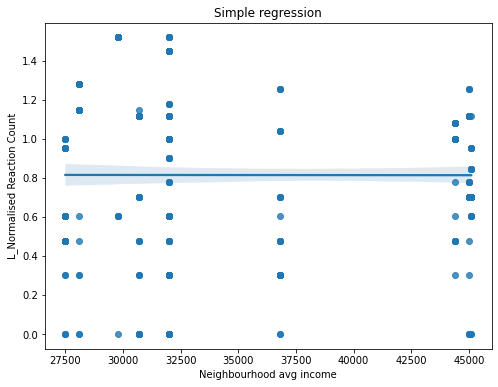

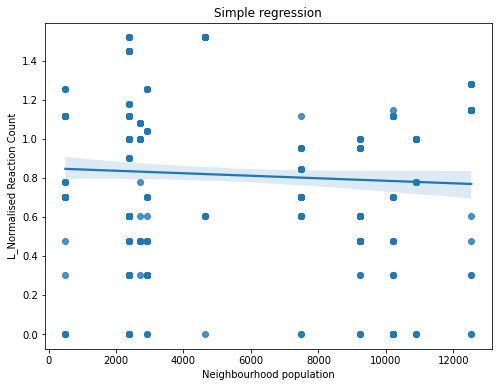

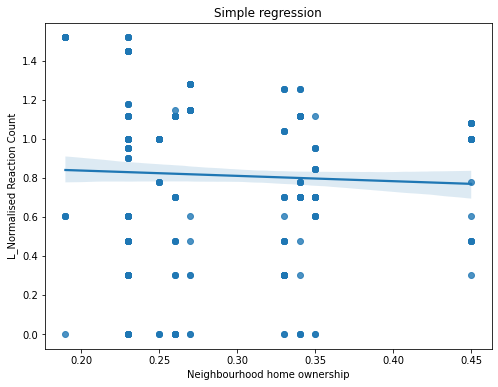

In [19]:
#Regression Analysis
'''
Predictor: AVG INCOME, POPULATION, HOME OWNERSHIP
Outcome: NORMALISED REACTION COUNT
'''
#Plotting 
plt.figure(figsize=(8,6)) #set figure size
sns.regplot(x = df_reaction_comment['Neighbourhood avg income'], y = df_reaction_comment['L_Normalised Reaction Count'])
plt.title('Simple regression')

plt.figure(figsize=(8,6)) #set figure size
sns.regplot(x = df_reaction_comment['Neighbourhood population'], y = df_reaction_comment['L_Normalised Reaction Count'])
plt.title('Simple regression')

plt.figure(figsize=(8,6)) #set figure size
sns.regplot(x = df_reaction_comment['Neighbourhood home ownership'], y = df_reaction_comment['L_Normalised Reaction Count'])
plt.title('Simple regression')

#Stat analysis
X = sm.add_constant(df_reaction_comment[['Neighbourhood avg income','Neighbourhood population', 'Neighbourhood home ownership']]) 
y = df_reaction_comment['L_Normalised Reaction Count'] 

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                OLS Regression Results                                
Dep. Variable:     L_Normalised Comment Count   R-squared:                       0.062
Model:                                    OLS   Adj. R-squared:                  0.056
Method:                         Least Squares   F-statistic:                     10.92
Date:                        Thu, 13 Apr 2023   Prob (F-statistic):           5.91e-07
Time:                                23:02:45   Log-Likelihood:                -253.81
No. Observations:                         501   AIC:                             515.6
Df Residuals:                             497   BIC:                             532.5
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

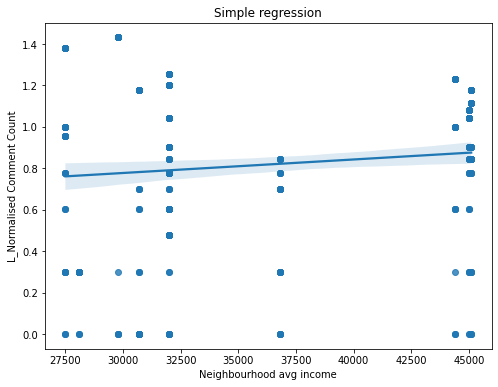

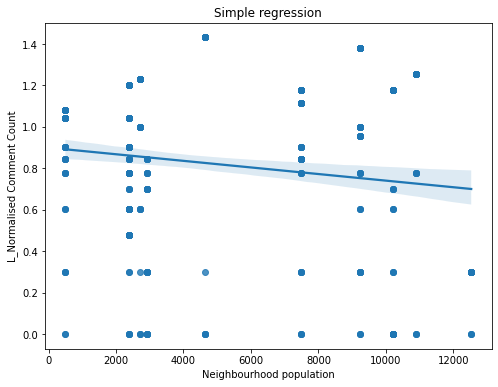

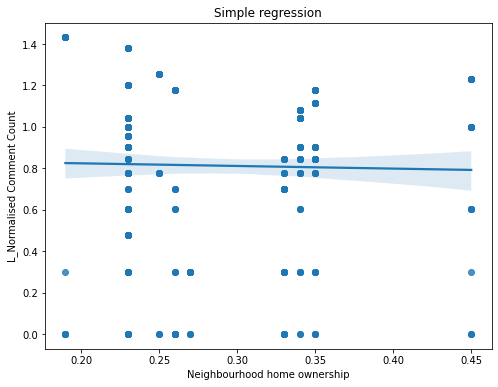

In [20]:
#Regression Analysis
'''
Predictor: AVG INCOME, POPULATION, HOME OWNERSHIP
Outcome: NORMALISED COMMENT COUNT
'''
#Plotting 
plt.figure(figsize=(8,6)) #set figure size
sns.regplot(x = df_reaction_comment['Neighbourhood avg income'], y = df_reaction_comment['L_Normalised Comment Count'])
plt.title('Simple regression')

plt.figure(figsize=(8,6)) #set figure size
sns.regplot(x = df_reaction_comment['Neighbourhood population'], y = df_reaction_comment['L_Normalised Comment Count'])
plt.title('Simple regression')

plt.figure(figsize=(8,6)) #set figure size
sns.regplot(x = df_reaction_comment['Neighbourhood home ownership'], y = df_reaction_comment['L_Normalised Comment Count'])
plt.title('Simple regression')

#Stat analysis
X = sm.add_constant(df_reaction_comment[['Neighbourhood avg income','Neighbourhood population', 'Neighbourhood home ownership']]) 
y = df_reaction_comment['L_Normalised Comment Count'] 

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())